In [15]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt

**Problem Statement**  
Consider a filter whose transfer function is 
\[
H(f) = \frac{e^{-2 \pi f i}}{10f + 10}.
\]
Which of the following is the correct value for the gain of the filter at \(f = 3\) Hz, in decibels?  
(“Gain” refers to the increase or decrease in signal power after applying the filter.)


In [2]:
# How do you find magnitude 
    # Take absolute value of the numerator divided by the absolute value of denominator
    # For any real number theta magnitude of e^i(theta) (absolute value) is always 1 

# find |H(3)|
H_3 = np.abs(np.e**(-2 * np.pi * 3j)) / np.abs(10*3+10) #1/40
#0.025

# Gain can be expressed in amplitude (voltage) or power -- which is being asked for
    # convert to dB (power)

H_3_dB = 10*np.log10(np.abs(H_3)**2)
H_3_dB


-32.04119982655924

**Problem Statement**  
Consider a Finite Impulse Response (FIR) filter whose kernel is:

- \(h[k = 0] = 5\)
- \(h[k = 1] = -2\)
- \(h[k = 2] = -1\)
- \(h[k = 3] = 1\)
- \(h[k] = 0\) for all other values of \(k\).

What is the order of this filter?


In [3]:
# If an FIR filter has N total taps (from k = 0 to k = N-1) -- order is N-1
# Taps are Coefficents
# If have taps at k = 0,1,2,3, total taps is 4
# So order is 3

In [4]:
url='https://www.dropbox.com/s/x3798tawhz5mlq3/HW5_anesthesia_record_125Hz.csv?dl=1'

data=pd.read_csv(url,header=None)[0]

print(data.head())

0    1.36840
1    3.83230
2    3.58290
3    1.57000
4   -0.33448
Name: 0, dtype: float64


This dataset contains 50 minutes (3,000 s) of EEG data recorded from a healthy human subject during the induction of general anesthesia using the drug propofol.  The values are in units of µV. During the first ~1000 s the subject is awake, and afterwards they lose consciousness with increasing doses of the anesthetic drug. The data have been sampled at Fs=125 Hz.

What is the average power, in units of µV^2, during the first 60 s of this recording? The average power is just the average of the square of the signal. (You may round to the nearest integer)

In [8]:
# sum all of the squared values and divide by total number of samples
# N is number of samples in 60 seconds -- sampling freq. * 60 
N = 125*60
data_first = data[:N]
avg_power_first = (1/N)*np.sum(data_first**2)
print(avg_power_first)

28.889515648159996


Calculate the short-time Fourier transform (also called the spectrogram) for this recording. Use windows of length 4 s with no overlap between neighboring windows. You may use default parameters for the other options (e.g. use a Hanning window).

Use the python function:

f,t,S = scipy.signal.stftLinks to an external site.(data, fs=Fs, nperseg= ?? )

What is the value of nperseg?

In [7]:
# nperseg is number of samples per second 
# e.g. if you have a sampling rate of 125 Hz & want each segment to span 4 seconds set
# nperseg = 125 x 4 = 500 samples (sampling rate * window length )

f,t,S = scipy.signal.stft(data, fs= 125, nperseg= 500)

What is the average power during the final 60 s of the recording?

In [9]:
data_final = data[-N:]  # last 60 seconds of data
avg_power_final = (1/N) * np.sum(data_final**2)
print(avg_power_final)


1237.3198531473424


Calculate the log (base 10) of the spectral power (i.e. absolute value squared of the short-time Fourier transform). Make a colormap (also called a heatmap) plot showing the log spectral power (i.e. absolute value squared of the spectrum), with time on the x-axis and frequency on the y-axis. Label the axes, and add a labeled colorbar that shows the meaning of the colors in the plot.
Hint: In python, use matplotlib.pyplot.pcolor, matplotlib.pyplot.colorbar.

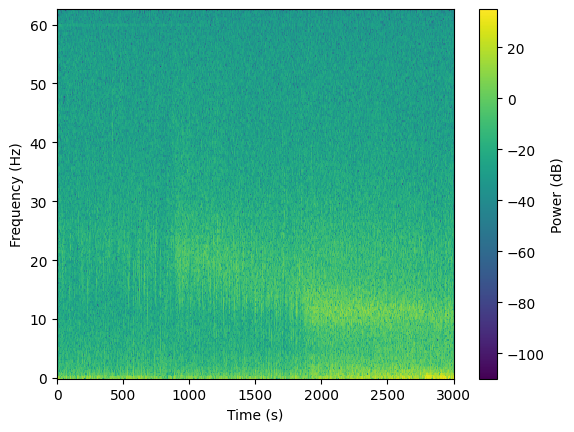

In [ ]:
# spectal power is magnitude squared of STFT values (S)
spec_power_db = 10 * np.log10(np.abs(S)**2)
plt.pcolor(t, f, spec_power_db)

plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar = plt.colorbar(label='Power (dB)')
plt.show()

# from the graph we can see that their is a increase in power at 1 and 10hz after

What is the frequency resolution, delta f, of this spectrogram, in Hz?

In [ ]:
https://canvas.ucsd.edu/courses/61647

0.25